In [211]:
# 출처
# 치매오늘은 https://www.nid.or.kr/info/today_list.aspx#a
# 국민건강보험공단_치매의료이용률 https://www.data.go.kr/data/15089354/fileData.do
# 전국치매센터표준데이터 https://www.data.go.kr/data/15021138/standard.do

import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import platform
import numpy as np

if platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.style.use('ggplot')

In [212]:
conn = pymysql.connect(host='localhost', user='root', password='0000', 
db = 'dementia_db', charset='utf8')
cur = conn.cursor() # 커서 객체 생성

In [213]:
cur.execute("""select 연도, `치매 환자수` from 치매유병현황
where 연령별 = '60세이상' and 성별 ='전체'
order by 연도;""") # 쿼리 실행
d_center03 = cur.fetchall() # fetchall() : 모든 검색 데이터 가져오기
center_desc = cur.description # SQL에서 컬럼명 가져오기
d_center_df03 = pd.DataFrame(d_center03) # DataFrame 형태로 변환

d_center_df03.columns=[i[0] for i in center_desc] # 컬럼명 부여
d_center_df03['연도'] = pd.to_datetime(d_center_df03['연도'], format='%Y')
d_center_df03

,연도,치매 환자수
0,2015-01-01,"641,839"
1,2016-01-01,"679,810"
2,2017-01-01,"724,903"
3,2018-01-01,"771,203"
4,2019-01-01,"816,393"
5,2020-01-01,"863,542.09"
6,2021-01-01,"910,726.84"
7,2022-01-01,"950,351"
8,2023-01-01,"1,003,161"
9,2024-01-01,"1,051,553"


(array([16071., 16801., 17532., 18262., 18993., 19723., 20454., 21184.,
        21915., 22645.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

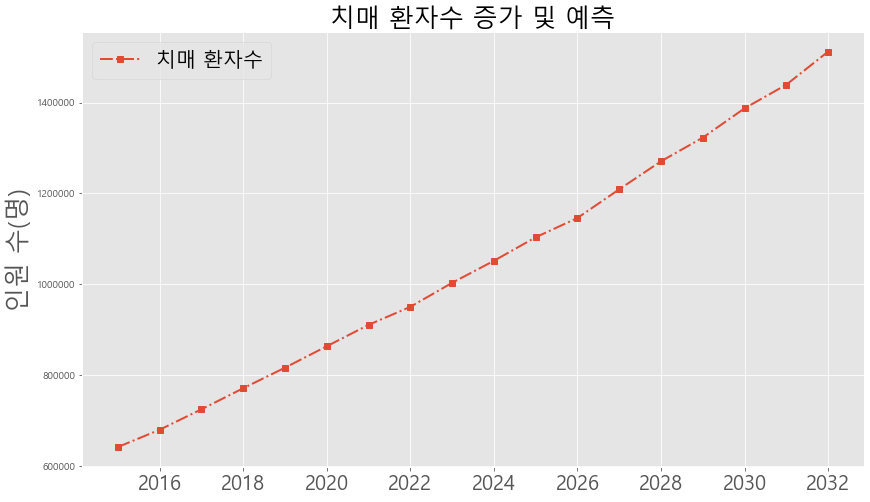

In [214]:
plt.figure(figsize=(14, 8))
plt.plot(d_center_df03['연도'], d_center_df03['치매 환자수'].apply(lambda x:x.replace(',','')).astype('float64'), marker='s', linestyle='dashdot', linewidth=2)

plt.legend(d_center_df03.columns[1:], fontsize=20)
plt.ylabel('인원 수(명)', fontsize=25)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

plt.title('치매 환자수 증가 및 예측', fontsize=25)
plt.xticks(fontsize=20)

##### 대한민국 65세 이상 고령자 비중 16% 이상 -> 초고령 사회 임박
##### 대한민국 60세 이상 치매 유병률 9 ~ 10%
##### 치매 환자 증가

In [215]:
cur.execute("""select 연도, `치매 환자수`, `노인인구수` from 치매유병현황
where 연령별 = '60세이상' and 성별 ='전체'
order by 연도;""") # 쿼리 실행
d_center02 = cur.fetchall() # fetchall() : 모든 검색 데이터 가져오기
center_desc = cur.description # SQL에서 컬럼명 가져오기
d_center_df02 = pd.DataFrame(d_center02) # DataFrame 형태로 변환

d_center_df02.columns=[i[0] for i in center_desc] # 컬럼명 부여
d_center_df02['연도'] = pd.to_datetime(d_center_df02['연도'], format='%Y')
d_center_df02

,연도,치매 환자수,노인인구수
0,2015-01-01,"641,839","9,267,667"
1,2016-01-01,"679,810","9,746,591"
2,2017-01-01,"724,903","10,242,206"
3,2018-01-01,"771,203","10,765,609"
4,2019-01-01,"816,393","11,320,069"
5,2020-01-01,"863,542.09","11,939,384"
6,2021-01-01,"910,726.84","12,575,641.50"
7,2022-01-01,"950,351","13,132,163"
8,2023-01-01,"1,003,161","13,719,186"
9,2024-01-01,"1,051,553","14,175,303"


In [216]:
cur.execute("""select 이용률.연도, 이용률.`국민보험 가입자`, 현황.노인인구수, 현황.`치매 환자수`, round(avg(`이용환자 수`)) as `이용환자 수`
from 국민건강보험공단_치매의료이용률 as 이용률 inner join 치매유병현황 as 현황
on 이용률.연도 = 현황.연도
where (이용률.연도 between 2015 and 2019)
group by 이용률.연도 ;""") # 쿼리 실행
d_center04 = cur.fetchall() # fetchall() : 모든 검색 데이터 가져오기
center_desc = cur.description # SQL에서 컬럼명 가져오기
d_center_df04 = pd.DataFrame(d_center04) # DataFrame 형태로 변환

d_center_df04.columns=[i[0] for i in center_desc] # 컬럼명 부여
d_center_df04['연도'] = pd.to_datetime(d_center_df04['연도'], format='%Y')
d_center_df04

,연도,국민보험 가입자,노인인구수,치매 환자수,이용환자 수
0,2015-01-01,26605214,"5,188,822","404,442",6094
1,2016-01-01,27173164,"5,434,430","426,712",6800
2,2017-01-01,27720249,"5,684,138","452,577",7565
3,2018-01-01,28183369,"5,946,355","478,130",8391
4,2019-01-01,28822687,"7,718,616","794,280",9189


(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

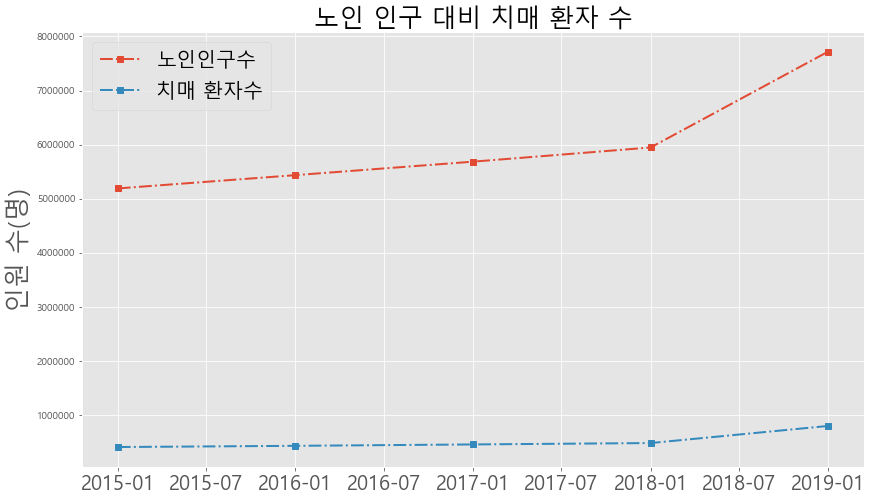

In [217]:
plt.figure(figsize=(14, 8))
# plt.plot(d_center_df02['연도'], d_center_df02['국민보험 가입자'], marker='o', linestyle='dashdot', linewidth=2)
plt.plot(d_center_df04['연도'], d_center_df04['노인인구수'].apply(lambda x:x.replace(',','')).astype('float64'), marker='s', linestyle='dashdot', linewidth=2)
plt.plot(d_center_df04['연도'], d_center_df04['치매 환자수'].apply(lambda x:x.replace(',','')).astype('float64'), marker='s', linestyle='dashdot', linewidth=2)
# plt.plot(d_center_df02['연도'], d_center_df02['이용환자 수'], marker='s', linestyle='dashdot', linewidth=2)

plt.legend(d_center_df04.columns[2:], fontsize=20)
plt.ylabel('인원 수(명)', fontsize=25)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

plt.title('노인 인구 대비 치매 환자 수', fontsize=25)
plt.xticks(fontsize=20)

(array([16436., 16617., 16801., 16983., 17167., 17348., 17532., 17713.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

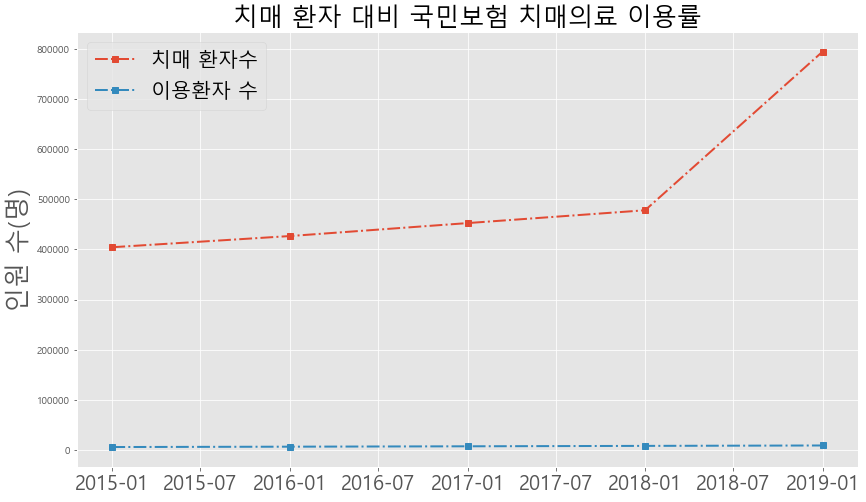

In [225]:
plt.figure(figsize=(14, 8))
# plt.plot(d_center_df02['연도'], d_center_df02['국민보험 가입자'], marker='o', linestyle='dashdot', linewidth=2)
# plt.plot(d_center_df04['연도'], d_center_df04['노인인구수'].apply(lambda x:x.replace(',','')).astype('float64'), marker='s', linestyle='dashdot', linewidth=2)
plt.plot(d_center_df04['연도'], d_center_df04['치매 환자수'].apply(lambda x:x.replace(',','')).astype('float64'), marker='s', linestyle='dashdot', linewidth=2)
plt.plot(d_center_df04['연도'], d_center_df04['이용환자 수'], marker='s', linestyle='dashdot', linewidth=2)

plt.legend(d_center_df04.columns[3:], fontsize=20)
plt.ylabel('인원 수(명)', fontsize=25)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')

plt.title('치매 환자 대비 국민보험 치매의료 이용률', fontsize=25)
plt.xticks(fontsize=20)

In [ ]:
cur.execute('select 연도, `국민보험 가입자`, round(avg(`이용환자 수`)), round(avg(`지표값(퍼센트)`), 2) from 국민건강보험공단_치매의료이용률 group by 연도;') # 쿼리 실행
d_center = cur.fetchall() # fetchall() : 모든 검색 데이터 가져오기
# center_desc = cur.description
d_center_df = pd.DataFrame(d_center) # DataFrame 형태로 변환

# d_center_df.columns=[center_desc[i][0] for i in range(4)]

# d_center_df.columns=[i[0] for i in center_desc]

# result = []
# for i in range(4):
#     result.append(center_desc[i][0])
# d_center_df.columns=result

d_center_df.columns=['연도', '국민보험 가입자', '이용환자 수', '지표값(퍼센트)']
# d_center_df = d_center_df.set_index('연도')
d_center_df['연도'] = pd.to_datetime(d_center_df['연도'], format='%Y') # Datetime으로 형변환
d_center_df

,연도,국민보험 가입자,이용환자 수,지표값(퍼센트)
0,2002-01-01,17654597,193,0.09
1,2003-01-01,18440120,218,0.10
2,2004-01-01,19301896,237,0.11
3,2005-01-01,19994616,417,0.19
4,2006-01-01,20586565,748,0.36
5,2007-01-01,21278414,1083,0.51
6,2008-01-01,21972401,1496,0.69
7,2009-01-01,22705085,2180,1.01
8,2010-01-01,23003174,2720,1.28
9,2011-01-01,23746688,3363,1.57


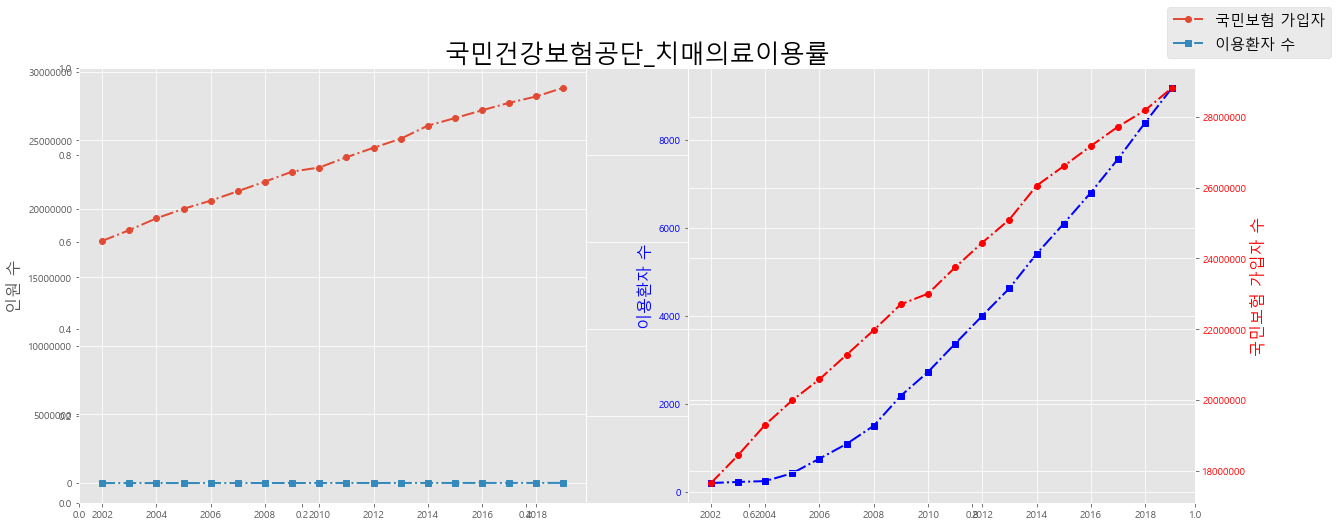

In [ ]:
fig = plt.figure(figsize=(20,8)) ## 캔버스 생성
plt.title('국민건강보험공단_치매의료이용률', fontsize=25)

ax0 = fig.add_subplot(1,2,1)
# color1 = 'b'
ax0.plot(d_center_df['연도'], d_center_df['국민보험 가입자'], marker='o', linestyle='dashdot', linewidth=2)
ax0.plot(d_center_df['연도'], d_center_df['이용환자 수'], marker='s', linestyle='dashdot', linewidth=2)
ax0.set_ylabel('인원 수', fontsize=16)
ax0.ticklabel_format(axis='y',useOffset=False, style='plain')

# -------------------------------------------------------------

# fig.set_facecolor('white')
ax1 = fig.add_subplot(1,2,2) ## axes 생성
 
color1 = 'b'
ax1.plot(d_center_df['연도'], d_center_df['이용환자 수'], color=color1, marker='s', linestyle='dashdot', linewidth=2)
ax1.set_ylabel('이용환자 수', color=color1, fontsize=16)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.ticklabel_format(axis='y',useOffset=False, style='plain')

color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(d_center_df['연도'], d_center_df['국민보험 가입자'], color=color2, marker='o', linestyle='dashdot', linewidth=2)
ax2.set_ylabel('국민보험 가입자 수', color=color2, fontsize=16)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.ticklabel_format(axis='y',useOffset=False, style='plain')

fig.legend(d_center_df.columns[1:3], fontsize=15)
plt.show()

## 지역별 치매센터

In [ ]:
# region_text = 'select substr(제공기관명, 1, position(' ' in 제공기관명)-1) as 지역, count(*) as `센터 개수` from 전국치매센터표준데이터 group by 지역;'

cur.execute("""select case 
when position(' ' in 제공기관명) = 0 then 제공기관명
when position(' ' in 제공기관명) > 0 then substr(제공기관명, 1, position(' ' in 제공기관명)-1)
else null
end as 지역, count(*) as `센터 개수`
from 전국치매센터표준데이터
group by 지역;""") # 쿼리 실행
d_center_region = cur.fetchall() # fetchall() : 모든 검색 데이터 가져오기
center_desc = cur.description
d_center_region_df = pd.DataFrame(d_center_region) # DataFrame 형태로 변환
d_center_region_df.columns = [i[0] for i in center_desc]
d_center_region_df

,지역,센터 개수
0,전라북도,16
1,울산광역시,10
2,경기도,57
3,경상북도,26
4,부산광역시,20
5,전라남도,45
6,경상남도,21
7,서울특별시,26
8,충청북도,14
9,충청남도,16


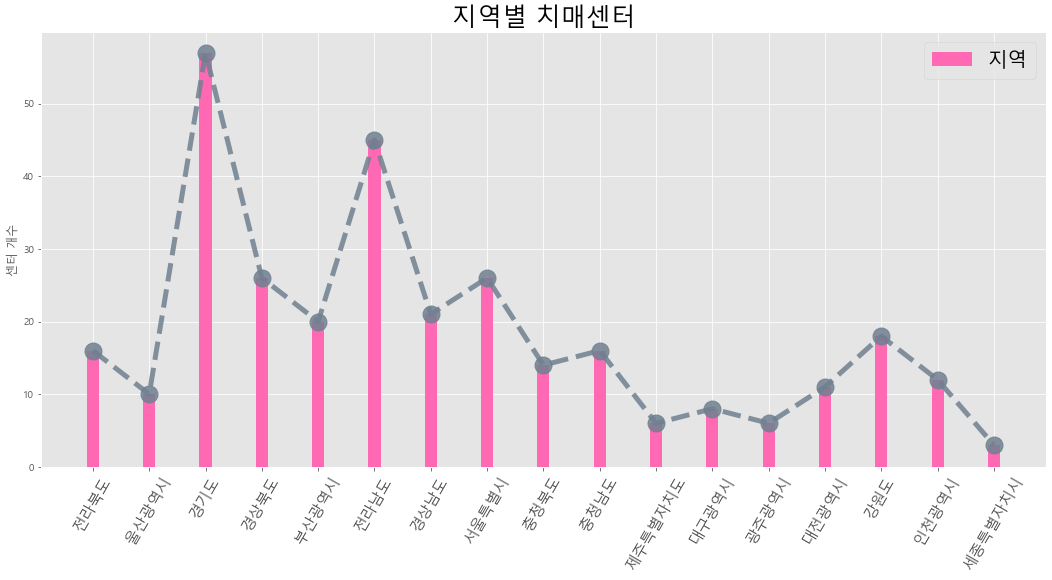

In [ ]:
w=0.215
nrow = d_center_region_df.shape[0] 
idx = np.arange(nrow)

plt.figure(figsize = (18, 8))
plt.title('지역별 치매센터', fontsize=25)
# plt.xlabel('')
plt.ylabel('센터 개수')
plt.bar(idx - 0 * w, d_center_region_df['센터 개수'], width = w, label = '지역', color='hotpink')
plt.plot(idx - 0 * w, d_center_region_df['센터 개수'], 'o--', markersize=17, color='slategray', linewidth=5, alpha=0.85)
plt.xticks(idx, d_center_region_df['지역'], rotation = 60, fontsize=15)
plt.legend(ncol = 5, fontsize=20)

# plt.style.use('ggplot')
plt.show()

### 센터 수, 의사 수 모두 적음

In [ ]:
# select distinct 의사인원수, count(의사인원수) from 전국치매센터표준데이터
# where 의사인원수 in (select 의사인원수 from 전국치매센터표준데이터 where 의사인원수 = 0);

### 총 315곳의 치매센터 중 의사 인원수가 0명인 센터 - 127곳

# 노인 인구의 증가, 치매 환자 증가